In [ ]:
import pandas as pd
import seaborn as sns

In [8]:
def preprocess_data(data):
    df=data.copy()
    df['Age']=2021-df['Year']
    df.drop(columns=['Year','Car_Name'],inplace=True)
    return df

In [10]:
train_data=pd.read_csv('../files/input/train_data.csv.zip',compression='zip')

In [11]:
train_data_clean=preprocess_data(train_data)

In [12]:
train_data_clean

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,7.40,8.500,15059,Petrol,Dealer,Automatic,0,5
1,4.00,4.600,30000,Petrol,Dealer,Manual,0,8
2,0.50,0.826,6000,Petrol,Individual,Manual,0,10
3,3.15,4.430,15000,Petrol,Dealer,Manual,0,5
4,1.25,1.500,15000,Petrol,Individual,Manual,0,8
...,...,...,...,...,...,...,...,...
206,2.55,4.430,57000,Petrol,Dealer,Manual,0,10
207,3.95,6.800,36000,Petrol,Dealer,Manual,0,6
208,0.10,0.750,92233,Petrol,Individual,Manual,0,15
209,6.00,7.600,77632,Diesel,Dealer,Manual,0,7


In [13]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  211 non-null    float64
 1   Present_Price  211 non-null    float64
 2   Driven_kms     211 non-null    int64  
 3   Fuel_Type      211 non-null    object 
 4   Selling_type   211 non-null    object 
 5   Transmission   211 non-null    object 
 6   Owner          211 non-null    int64  
 7   Age            211 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 13.3+ KB


In [15]:
train_data_clean.describe()

,Selling_Price,Present_Price,Driven_kms,Owner,Age
count,211.000000,211.000000,211.000000,211.000000,211.000000
mean,4.692512,7.561090,35578.009479,0.047393,7.355450
std,4.819333,7.382453,28912.475577,0.271907,2.794843
min,0.100000,0.480000,1200.000000,0.000000,3.000000
25%,1.025000,1.365000,15000.000000,0.000000,5.000000
50%,3.750000,6.400000,32000.000000,0.000000,7.000000
75%,6.050000,9.900000,47500.000000,0.000000,9.000000
max,23.500000,35.960000,213000.000000,3.000000,18.000000


In [17]:
train_data_clean['Owner'].value_counts()

Owner
0    203
1      7
3      1
Name: count, dtype: int64

In [16]:
train_data_clean.sample(10)

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
39,4.50,6.79,32000,Petrol,Dealer,Automatic,0,8
127,0.42,0.73,12000,Petrol,Individual,Manual,0,8
78,9.25,9.83,2071,Diesel,Dealer,Manual,0,3
99,0.55,0.84,58000,Petrol,Individual,Manual,0,6
210,6.00,8.40,4000,Petrol,Dealer,Manual,0,5
145,16.00,30.61,135000,Diesel,Individual,Automatic,0,8
131,3.50,5.43,38488,Petrol,Dealer,Manual,0,4
197,5.95,9.40,49000,Diesel,Dealer,Manual,0,8
157,4.50,7.27,40534,Petrol,Dealer,Manual,0,6
35,4.75,6.76,40000,Petrol,Dealer,Manual,0,7


In [26]:
train_data_clean[train_data_clean['Selling_Price']>5]

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,7.40,8.50,15059,Petrol,Dealer,Automatic,0,5
5,5.75,7.13,12479,Petrol,Dealer,Manual,0,4
8,8.40,13.60,34000,Petrol,Dealer,Manual,0,6
10,8.35,9.40,19434,Diesel,Dealer,Manual,0,5
12,5.30,5.90,5464,Petrol,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
199,7.50,12.04,15000,Petrol,Dealer,Automatic,0,7
203,6.70,10.00,18828,Petrol,Dealer,Manual,0,6
205,6.50,8.70,21200,Petrol,Dealer,Manual,0,4
209,6.00,7.60,77632,Diesel,Dealer,Manual,0,7


In [28]:
train_data_clean['Fuel_Type'].value_counts()

Fuel_Type
Petrol    167
Diesel     42
CNG         2
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Present_Price'>

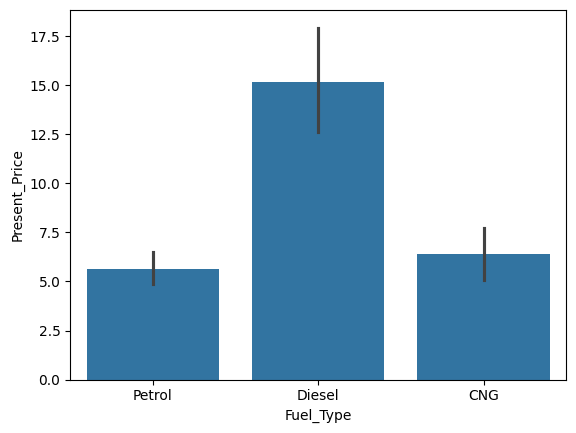

In [29]:
# Plot the average present price of cars based on the fuel type
sns.barplot(x='Fuel_Type',y='Present_Price',data=train_data_clean)

In [32]:
train_data_clean['Selling_type'].value_counts()

Selling_type
Dealer        137
Individual     74
Name: count, dtype: int64

<Axes: xlabel='Selling_type', ylabel='Present_Price'>

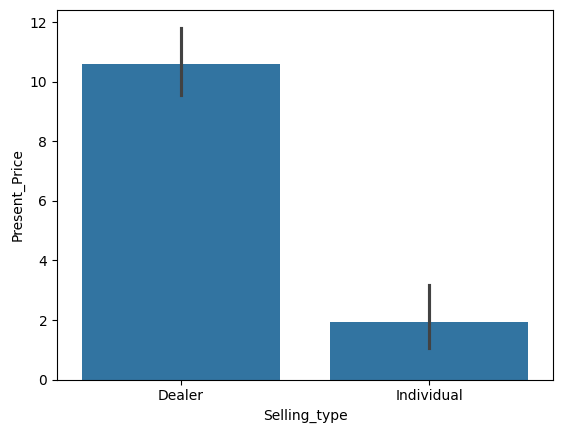

In [33]:
sns.barplot(x='Selling_type',y='Present_Price',data=train_data_clean)

In [34]:
cat_cols=['Fuel_Type','Transmission','Selling_type']

In [ ]:
# Use One Hot Encoding to convert categorical columns to numerical and add them to the dataframe
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore')
encoded_data=encoder.fit_transform(train_data_clean[cat_cols]).toarray()
encoded_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(cat_cols))
train_data_clean_2=pd.concat([train_data_clean,encoded_df],axis=1)
train_data_clean_2.drop(columns=cat_cols,inplace=True)

In [52]:
# Scale the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data_clean_2_scaled=train_data_clean_2.copy()
train_data_clean_2_scaled[train_data_clean_2_scaled.columns]=scaler.fit_transform(train_data_clean_2_scaled)


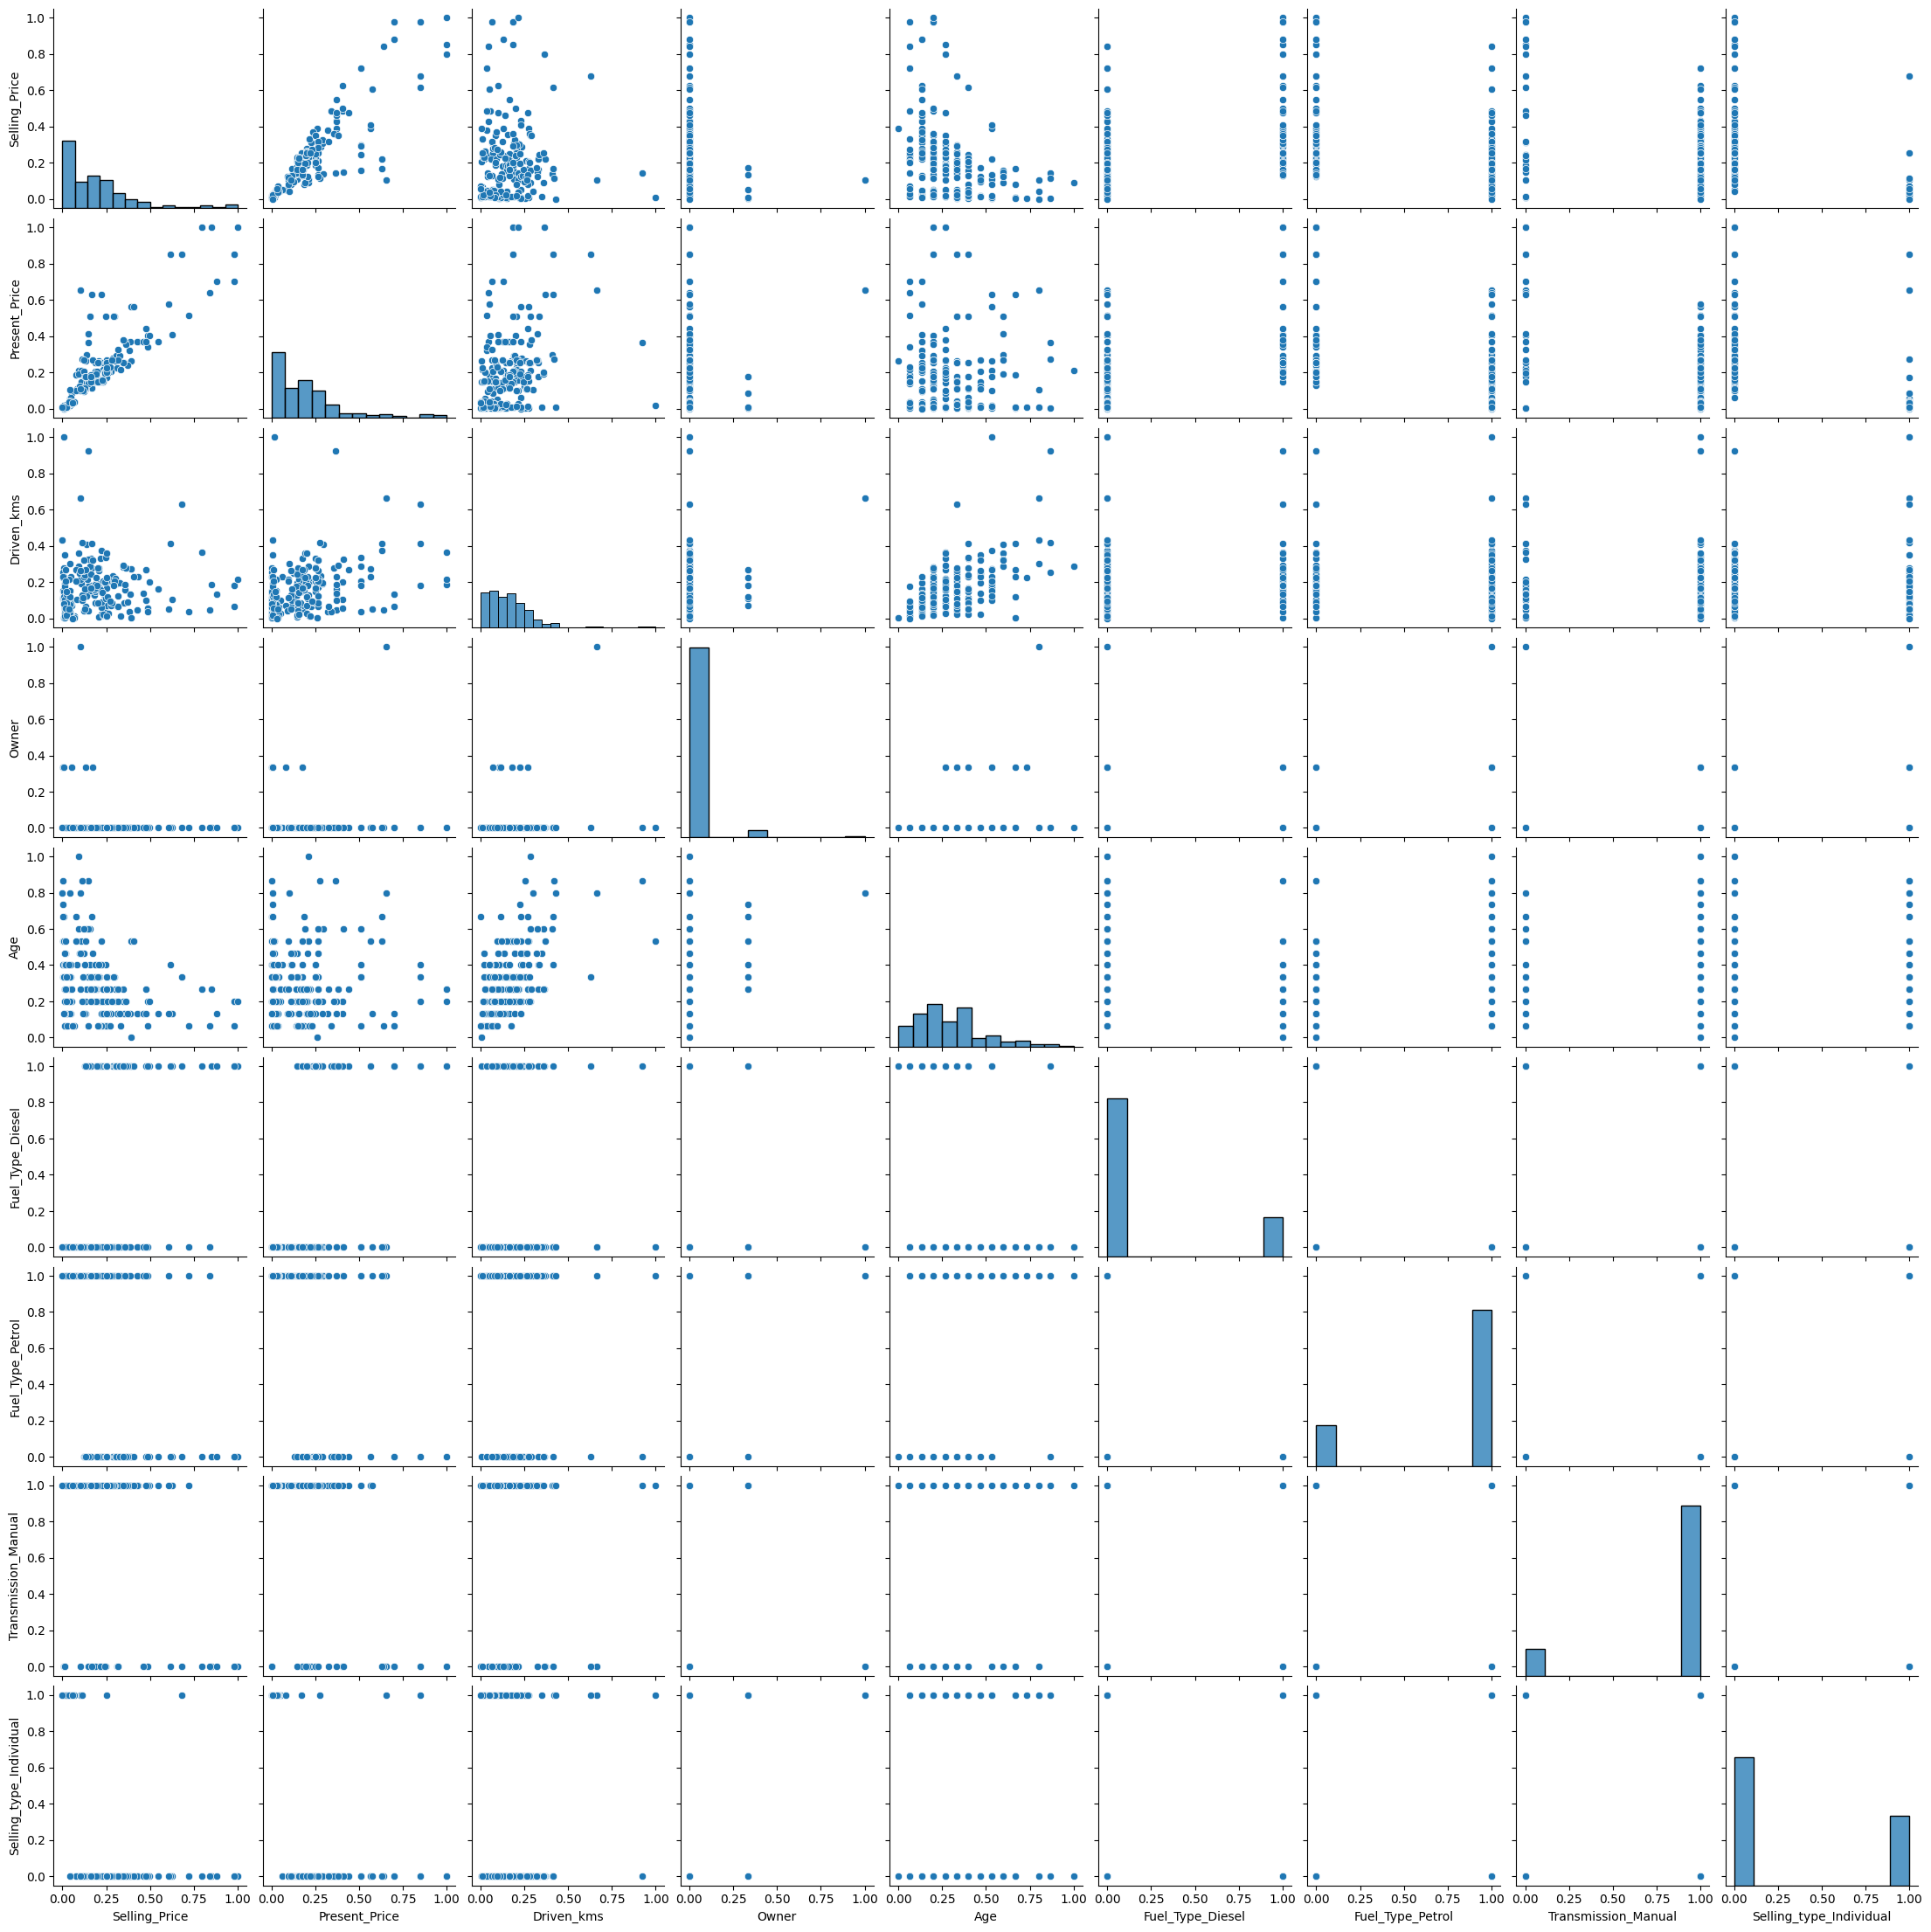

In [53]:
sns.pairplot(train_data_clean_2_scaled)

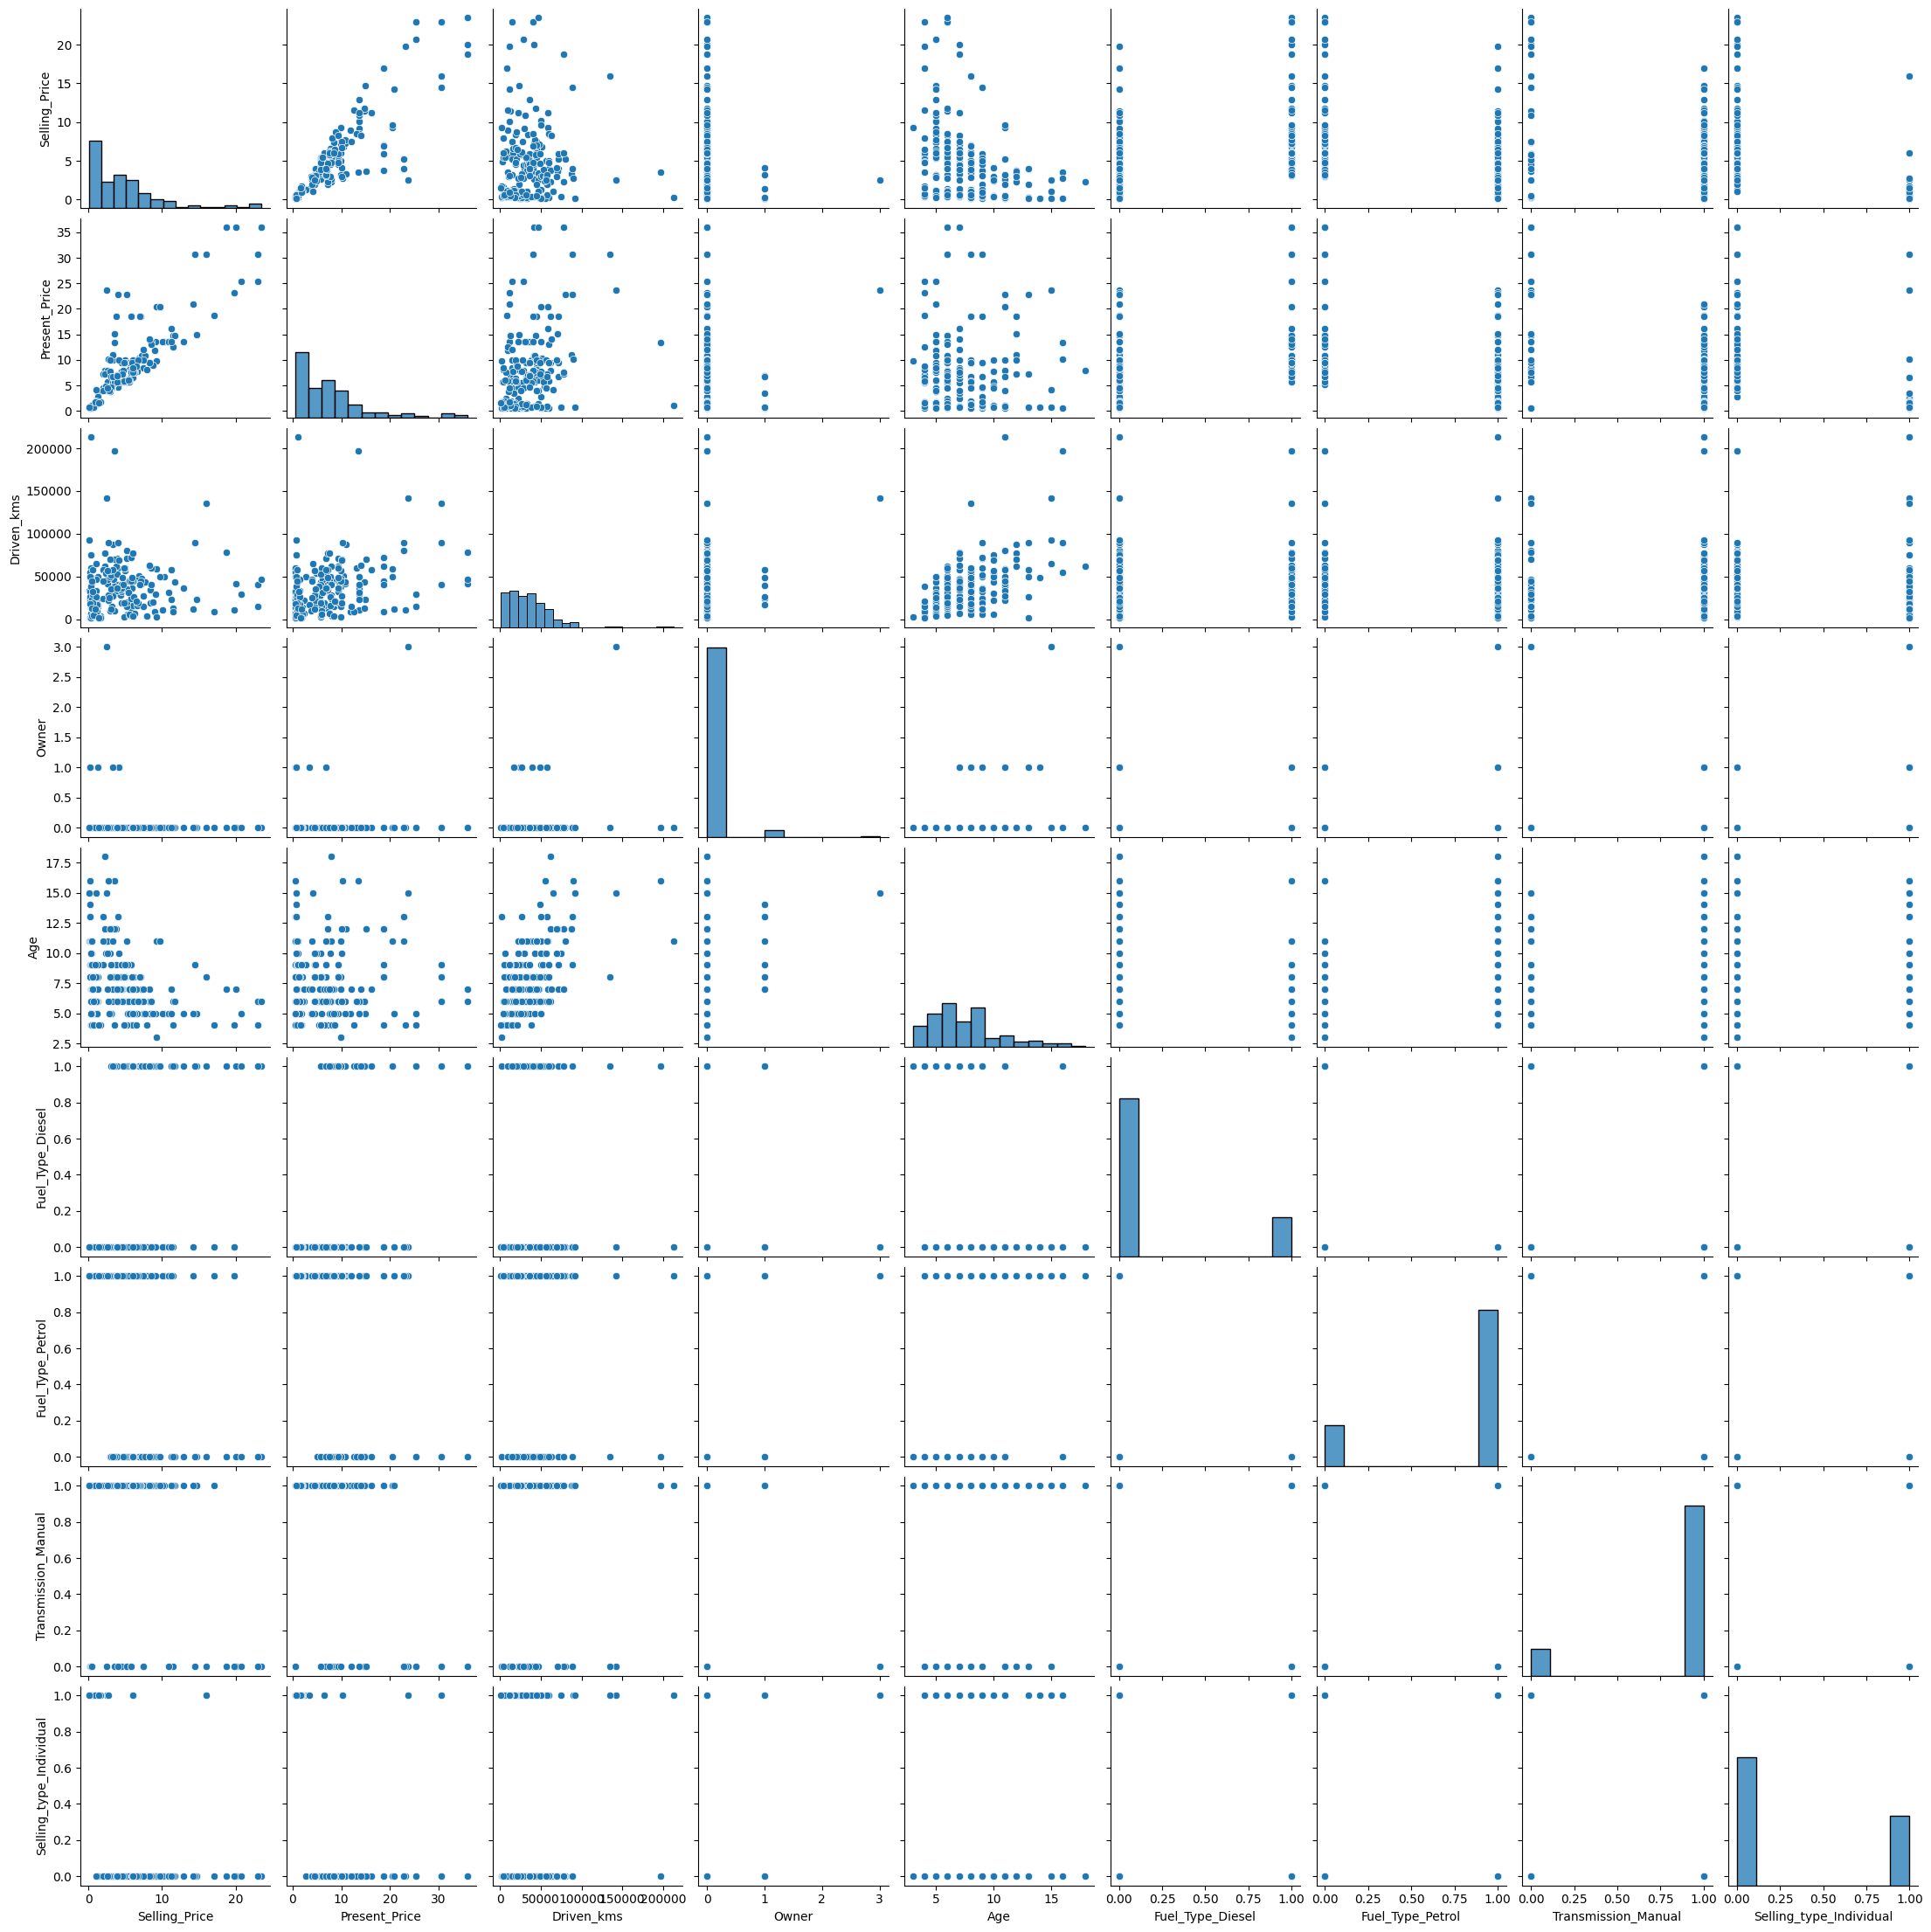

In [ ]:
sns.pairplot(train_data_clean_2)

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X=train_data_clean_2_scaled.drop(columns=['Present_Price'])
y=train_data_clean_2_scaled['Present_Price']

selector=SelectKBest(score_func=f_regression,k=6)
X_new=selector.fit_transform(X,y)

# Get the features that explain the target the most
print(X.columns[selector.get_support()])

# Print the scores that correspond to the selected features
print(selector.scores_[selector.get_support()])

Index(['Selling_Price', 'Driven_kms', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Selling_type_Individual'],
      dtype='object')
[772.69047755  26.69811016  75.71770115  70.86983767  70.117638
  96.7399845 ]
